# 必要的 Python 技巧

之所以说是技巧，是因为在课题的实战中，通常不需要对 Python 的大局有完整的了解——事实上那也是不可能的，且不论 PyPI 社区支持的第三方库有将近 20 万之多，其官方库的内容也非常庞大．在不能了解全局的情况下，我们需要一些投机取巧的方法以最小的编程能力完成重要的任务，不论是否完成得漂亮．这就是这一节文档的目的．

由于这不是一份新手上路的笔记，而是介绍一些经验技巧，因此最好阅读者有基础的 Python 能力，或者可以通过其它语言就可以快速熟悉 Python 的语法．如果读者已经了解这些技巧，那么就权当复习，在后续的笔记中很可能会非常经常地使用这些技巧；如果读者还没有基础的 Python 能力，那么可以通过搜索引擎查阅资料并理解代码，这比阅读书籍会快很多，尽管知识面会不成系统．

对于当前的课题，我们需要的能力除了要 Hacking PySCF 库外，最迫切的是 Python 的基本语法，以及 NumPy 在张量计算上的基本使用．我们将简明扼要地作介绍．

在这一份文档，我们会使用 NumPy、Matplotlib 以及 PySCF 的 lib 程序，因此我们在下面一个代码块中将它们引入．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyscf.lib

<div class="alert alert-info">

**任务**

1. 我们经常需要引入其它的库与文件．下面一行代码将会从源代码文件中引入对函数执行时间作输出的小程序 `timing` 与 `timing_level`．这些文件并不在 Python 库中，原则上我们需要手动引入这些文件；但我们可以通过更改 Bash 环境变量 `PYTHONPATH` 来让目录 `HF_DFT_related/src` 下的文件被 Python 解释器读取．请尝试更改 `PYTHONPATH`，重启 Jupyter 笔记本，使下述语句执行通过．

</div>

In [2]:
from utilities import timing, timing_level

## Python 语法相关

### 循环

Python 的循环可以非常灵活．列表 (list)、字典 (dict)、元组 (tule)、numpy 向量 (ndarray)、范围 (range) 等都是合法的迭代器．

In [3]:
for i in range(1, 7, 2):
    print(i)

1
3
5


我们可以通过循环构建列表．

In [4]:
lst = [[], [], []]
for i in range(3):
    for j in range(3):
        lst[i].append(10 * i + j)
lst

[[0, 1, 2], [10, 11, 12], [20, 21, 22]]

<div class="alert alert-warning">

**注意**

Python 的列表非常类似于 C 中的引用 (有时也称为浅复制 (Shallow Copy))．因此，下述的代码可能会打乱你的常识．因此，在可以避免使用 Python 列表的情况下，我建议尽量避免．索性在量化计算中，Python 的列表通常不起重要作用．

下述的代码还可以用于示范 `is` 与 `==` 符号的区别．

</div>

In [5]:
print([[]] * 3)
print([[]] * 3 is [[], [], []])  # Equivalent to print(id([[]] * 3) is id([[], [], []])), which shows the unique id for a Python object
print([[]] * 3 == [[], [], []])
lst = [[]] * 3
for i in range(3):
    for j in range(3):
        lst[i].append(10 * i + j)
lst

[[], [], []]
False
True


[[0, 1, 2, 10, 11, 12, 20, 21, 22],
 [0, 1, 2, 10, 11, 12, 20, 21, 22],
 [0, 1, 2, 10, 11, 12, 20, 21, 22]]

若循环的目的是生成列表，我们还可以使用隐式循环方法，避免多行多缩进代码，使代码更精炼．

In [6]:
lst = [[10 * i + j for j in range(3)] for i in range(3)]
lst

[[0, 1, 2], [10, 11, 12], [20, 21, 22]]

<div class="alert alert-info">

**任务**

1. 请交换上述代码块中的 `for j` 与 `for i`，并观察结果．以后在书写隐式多重循环时，要特别注意指标顺序是否会影响结果．

</div>

有时，我们要写高维度的循环；但由于 Python 语法中，缩进数量会随着循环维度的增高而增大，也许会使得代码从排版上难看不少．我们可以通过预先生成循环索引的方式来解决这个问题．以刚才的二维情况来举例：

In [7]:
loop_list = [(i, j)
             for i in range(3)
             for j in range(3)]
for i, j in loop_list:
    print(i, j)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


### Lambda 函数

我们知道，Python 中的函数可以使用 `def` 定义，并且函数本身可以作为参数被传参．现在，我们的目标是绘制一个泛函的图样；这个泛函可以表示为

$$
F[f(x)] = \sin(f(x))
$$

而如果现在我们希望 $f(x) = x^2 + 2x$，那么实现的程序如下：

In [8]:
def F(f):
    return lambda x : np.sin(f(x))

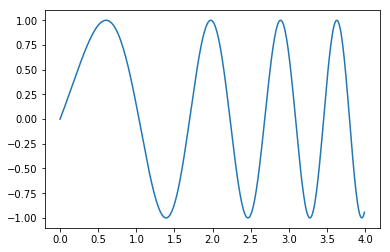

In [9]:
x_list = np.arange(0, 4, 0.01)
plt.plot(x_list, F(lambda x : x**2 + 2 * x)(x_list))

<div class="alert alert-info">

**任务**

1. 绘制 $\sin(- 1 / x^2)$ 在 $x \in (0.5, 4)$ 的图像．它的图像应当类似于 Morse 函数．

2. 不使用 lambda 函数，使用普通的函数定义泛函 $F[f(x)] = \sin(f(x))$ 与函数 $f(x) = - 1 / x^2$，将上述任务重复一遍．你是否倾向于使用 lambda 函数？我相信不同的人有不同的考量；并且 [一般认为](https://stackoverflow.com/questions/12264834/what-is-the-difference-for-python-between-lambda-and-regular-function)，在 Python 中，lambda 函数与普通函数的差别并不很大．

</div>

### 修饰符

修饰符是一种对函数封装的工具，它在函数的开头定义，并以 `@` 符号作为起始．

在以后的程序中，我们会经常使用两种修饰符．

第一种是属性 (property) 修饰符．这类似于 C# 语言中的属性 (相对于字段 (field))．其提供的好处是，可以像调用类内变量 (字段) 的方式来调用函数，并且对类内变量作一定程度的保护．

In [10]:
class Animal:
    def __init__(self):
        self._dog = "Canis lupus familiaris"
    @property
    def dog(self):
        return "id: " + str(np.random.randint(10)) + ", type: " + self._dog

你应当能发现下述语句的执行结果并不是始终一致，并且 `animal.dog` 不像一般的类内变量一样可以设置．

In [11]:
animal = Animal()
print(animal.dog)

id: 1, type: Canis lupus familiaris


<div class="alert alert-info">

**任务**

1. (可选) `animal.dog` 在修改上述代码但仍然保证 `dog` 由属性修饰符包装的情况下，也可以作为 setting 函数被调取．请尝试修改代码，使得下述代码与输出成立 (随机数除外)：

    ```python
>>> animal = Animal()
>>> animal.dog = "Japanese Akita"
Set dog type as Japanese Akita
>>> print(animal.dog)
id: 6, type: Japanese Akita
    ```

</div>

第二种修饰符是对函数执行时间作评估的函数．我们在文首已经从 `utilities` 引入了 `timing_level` 函数；我们现在调用它．

In [12]:
@timing_level(0)
def large_loop_1():
    return np.array([2 * i for i in range(10000)]).sum()
large_loop_1()

 large_loop_1                            , Elapsed time:      0.0014626980 s | called by <module>                                , in file "<ipython-input-12-ab0f16871aec>", line 4


99990000

刚才我们定义了一个看起来不太普通的函数 `large_loop_1`，但其执行的行为与下述普通函数 `large_loop_2` 的过程是一致的：

In [13]:
def large_loop_2():
    return np.array([2 * i for i in range(10000)]).sum()
timing_level(0)(large_loop_2)()

 large_loop_2                            , Elapsed time:      0.0016222000 s | called by <module>                                , in file "<ipython-input-13-23ab70052829>", line 3


99990000

## NumPy 相关

在以后，我们会使用修改版的 [Einstein Summation Convention](https://en.wikipedia.org/wiki/Einstein_notation)，即无上下标区分的张量角标，以简化公式表达，与 `np.einsum` 函数形成稳定的关联．

这里只是对一些问题作简要说明．尽管官方文档未必有更详细的说明，但如果想要细致地了解 numpy 函数的操作方法，请参见 [API 文档](https://docs.scipy.org/doc/numpy/reference/) 或直接查看 numpy 的程序本身．尽管与效率有关的 numpy 有关的程序是用 C 编写的，但大多数 C 编写的程序不是面向用户的，并且仍然有不少程序是 Python 程序．在类如 PyCharm 的 IDE 中，可以按 Ctrl 与鼠标左键直接跳到你想看的函数的源代码；在 PyCharm 中，还可以通过 Ctrl+Q 来显示函数或类的代码文档 (docstring)．

### 矩阵与张量定义

Numpy 的最基本单元是 [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) 类；一般来说，我们的矩阵与张量都是这个类的实例 (instance)．从列表可以生成一个矩阵：

In [14]:
mat = np.array(lst)
mat

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

矩阵的最基本信息包括矩阵维度、元素类型、占用内存空间大小等．这些可以从成员直接查看：

In [15]:
print(mat.dtype)
print(mat.shape)
print(mat.size)
print(mat.nbytes)

int64
(3, 3)
9
72


与 Fortran 不同，Python (包括绝大多数其它语言) 的索引是 0 索引：

In [16]:
mat[1]

array([10, 11, 12])

但与 Fortran 相同的是，通常可以使用冒号取其中的某一列 (这是 C 程序所不便利之处)：

In [17]:
mat[:, 1]

array([ 1, 11, 21])

<div class="alert alert-info">

**任务**

1. 生成一个不等维度的三维列表，并将其化为三维张量．观察三维张量的属性、并了解它是如何索引并输出的．

    在 Hessian 任务中，我们需要了解最高八维张量的计算，以及最高四维张量的输出．对任意维度张量的操控与调试是后面笔记中所经常使用的能力．

</div>

### 矩阵乘积

在量化计算中，最基本的操作是矩阵乘积．矩阵乘积在 numpy 中的实现方式至少有三种．在这里，我们会拿一个简单的例子作说明．

In [18]:
A = np.array([[1, 2, 3], [11, 12, 13]])                           # a.shape = (2, 3)
B = np.array([[1, 2, 3, 4], [11, 12, 13, 14], [21, 22, 23, 24]])  # b.shape = (3, 4)

我们知道，(2, 3) 维矩阵与 (3, 4) 维矩阵的乘积是 (2, 4) 维．这两个矩阵的乘积可以用 Einstein Convention 表示为

$$
C_{ij} = A_{ik} B_{kj}
$$

矩阵乘积的最标准写法是使用 `@` 或等价地 `np.matmul`；另两种写法是使用 `np.dot`，以及使用 `np.einsum`；后者则更直观地体现角标变化．

In [19]:
C_byat = A @ B
C_bydot = A.dot(B)  # equivalent to np.dot(A, B)
C_byein = np.einsum("ik, kj -> ij", A, B)
C_bydot

array([[ 86,  92,  98, 104],
       [416, 452, 488, 524]])

我们可以使用 `np.allclose` 来查看矩阵之间是否近乎相等．

In [20]:
print(np.allclose(C_byat, C_bydot))
print(np.allclose(C_byein, C_bydot))

True
True


<div class="alert alert-info">

**任务**

1. 使用 `np.dot` 的写法，写一段三矩阵连续相乘的代码；并指出在三矩阵相乘时，使用 `A.dot(B)` 比 `np.dot(A, B)` 的便利之处．在量化计算中，我们经常会遇到原子轨道 (AO) 矩阵转换到分子轨道 (MO) 矩阵的操作，这是一个三矩阵的计算．

2. 使用 `@` 与 `np.einsum` 写一段三矩阵连续相乘的代码，思考哪种方式更适合自己的公式代码化的思路．我相信不同的人有不同的见解．注意 `@` 需要用到两次，但 `np.einsum` 应该只能用到一次，即**不应该**出现如下代码：
    ```
    np.einsum("ik, kj -> ij", A, np.einsum("kl, lj -> kj", B, C))
    ```

3. (可选) 将
   ```
   np.einsum("ik, kj -> ij", A, B)
   ```
   更改为
   ```
   np.einsum("ik, kj", A, B)
   ```
   并查看效果．尽管我自己不太推荐这种做法，但这是 Einstein Convention 中“角标出现两次或以上时就对角标求和”的具体例子．
    

</div>

<div class="alert alert-info">

**提示**

在目前大小的矩阵下，使用 `np.dot` 的计算效率是最高的．一般来说，`np.einsum` 尽管代码直观，但在小维度或简单矩阵操作下，计算效率极低．但当矩阵或张量维度较大时，优化选项开启的 `np.einsum` 通常效率不低．

</div>

In [21]:
%%timeit -r 7 -n 10000
A @ B

1.78 µs ± 42.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%%timeit -r 7 -n 10000
A.dot(B)

1.48 µs ± 609 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%%timeit -r 7 -n 10000
np.einsum("ik, kj -> ij", A, B)

2.26 µs ± 77.9 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


除了矩阵乘积外，我们也有时使用矩阵与向量乘积．在 numpy 中，这可以同等地进行：

In [24]:
A.dot(B[:, 2])

array([ 98, 488])

### 张量转置

张量转置也是经常遇到的问题．张量转置的弱化问题是矩阵转置；矩阵转置几乎是显然的：

In [25]:
print(A)
print(A.T)

[[ 1  2  3]
 [11 12 13]]
[[ 1 11]
 [ 2 12]
 [ 3 13]]


但维度一高，张量转置问题就不是那么显然了．一般来说，张量转置可以通过 `np.transpose` 来解决．`np.einsum` 也能进行转置，其优势仍然是直观，但效率偏低，比较适合作为验证工具 (但通常不复制张量的数据，这可以使用 `np.base` 验证)；`np.swapaxes` 也可以解决张量转置工具，但只适合于对换两个角标．

我们拿一个不等维度的三维张量进行说明．转置的目标是

$$
R_{ijk} \rightarrow R_{ikj}
$$

In [26]:
R = np.arange(24).reshape(2, 3, 4)
R_T_byein = np.einsum("ijk -> ikj", R)
R_T_bytran = R.transpose(0, 2, 1)
R_T_byswap = R.swapaxes(1, 2)

In [27]:
print(np.allclose(R_T_byein, R_T_bytran))
print(np.allclose(R_T_byswap, R_T_bytran))

True
True


<div class="alert alert-info">

**任务**

1. 现在考虑涉及三角标的轮换的转置．如果现在的转置目标是 $R_{ijk} \rightarrow R_{jki}$，是应该使用 `R.transpose(1, 2, 0)`，还是 `R.transpose(2, 0, 1)`？请用 `np.einsum("ijk -> jki", R)`，或者用 `shape` 查看转之后张量的形状信息辅助验证．

2. 在了解张量转置后，我们可以拿已经有的变量来考察张量之间的乘法了．请分别执行
   ```
   R @ R.transpose(0, 2, 1)
   R.dot(R.transpose(0, 2, 1))
   ```
   通过 `np.einsum` 判断上述两条语句具体作了何种计算？并思考在作高维度张量乘法时，你倾向于使用哪个工具．
   
3. 我们再考虑张量与矩阵的乘法．请分别执行
   ```
   R @ B.T
   R.dot(B.T)
   R * B
   ```
   通过 `np.einsum` 判断上述三条语句具体作了何种计算？并思考作张量与矩阵乘法时，你倾向于使用哪个工具．
   
4. (可选) 张量与矩阵的乘法可以看成是高维与低维张量之间的乘法操作．事实上，矩阵与向量的乘法也是高维与低维张量之间的操作．比较你对这两种计算的代码习惯．

5. (可选) 在不看下文的情况下，先自己试试多个多维张量之间的乘法．个人的建议是，张量乘法之间的关系若比较复杂，请在一开始写程序的时候不要吝啬效率，尽可能放开地使用 `np.einsum`．

</div>

### ndarray 数据储存

在进行下面的话题前，我们有必要简单了解 ndarray 储存方式，以及使用 `np.base` 判断 ndarray 之间是否共享相同的数据内存空间．这有助于我们判断是否修改了张量的数值，或者判断是否复制了多余且无用的内存数据．这部分的描述也可以参考 [一份公开书籍](https://ipython-books.github.io/45-understanding-the-internals-of-numpy-to-avoid-unnecessary-array-copying/)．

ndarray 类型可以看成由底层数据与修饰信息构成；底层数据就是一个一个数值，而修饰信息则是由维度、拆分方式等构成．一般来说，修饰信息的内存占用总远小于底层数据．

在 numpy 中，除非必要，否则大多数时候不会真正地复制底层数据，只复制修饰信息．我们可以使用下面的 `get_memloc` 函数来获取 ndarray 底层数据的头指针在内存的位置信息：

In [28]:
def get_base(array):
    while isinstance(array.base, np.ndarray):
        array = array.base
    return array

def get_memloc(array):
    return get_base(array).__array_interface__['data'][0]

In [29]:
get_memloc(R)
R_NoCopy = R                                       # Nothing changed
R_ShallowCopy = R.view()
R_DeepCopy = R.copy()
print(R is R_NoCopy)                               # Equivalent to `id(R) == id(R_NoCopy)`
print(R is R_ShallowCopy)                          # Different id means objects are actually different
print(get_memloc(R) == get_memloc(R_ShallowCopy))  # ... but a shallow copy means that base data is not actually copied
print(get_memloc(R) == get_memloc(R_DeepCopy))     # A deep copy means all things are cloned to another block of memory
print(np.all(R == R_DeepCopy))                     # ... however, the value of copy is the exactly the same to origin

True
False
True
False
True


<div class="alert alert-info">

**任务**

1. (可选) 这里的 `get_base` 函数使用了 Python 的 `isinstance` 函数．该函数在 PySCF 的源代码中涉及到临时信息如何储存的部分中经常出现．但是我们也可以不使用循环与 `isinstance` 函数，而使用递归方法来写 `get_base`．试写出这样一个函数．

    提示：你应当可以发现 `type(R.base) == np.ndarray` 但 `R.base.base is None == True`．

</div>

张量单纯的转置通常不复制数据，即使显然 `R != R_T_bytran`：

In [30]:
print(get_memloc(R) == get_memloc(R_T_bytran))
try: print(np.allclose(R, R_T_bytran))
except ValueError: print(False)

True
False


但是，如果要重塑矩阵，让第一维度与第二维度合并，那么在必要的情况下，数据**可能会被复制**．之所以数据会改变，是因为合并维度可能会导致内存顺序的不连续的情况发生；但之所以说是可能而并非肯定，是因为不是所有合并维度都会使内存顺序不连续．

In [31]:
print(get_memloc(R) == get_memloc(R.reshape(-1, 6)))
print(get_memloc(R) == get_memloc(R.reshape(8, 3)))
print(get_memloc(R) == get_memloc(R.transpose(0, 2, 1).reshape(-1, 3)))
print(get_memloc(R) == get_memloc(R.transpose(1, 0, 2).reshape(3, 2, 2, 2)))

True
True
False
True


<div class="alert alert-info">

**任务**

1. 这里第一次出现了 `np.reshape`．这在后续程序中会是一个经常使用的命令．上面的四行程序的理解应当足够应对以后的张量变形的操作．请打出上述变形重塑后的张量，观察变化情况．

2. 判断上述代码块中最后一行程序为何输出 True．

3. (可选) 这里出现了 Python 中的异常处理 try-except 代码．你可以试试输出 `print(np.allclose(R, R_T_bytran))` 的运行结果，并看看运行出错的类型；然后理解 try-except 代码．异常处理通常可以用于程序不应因出错而终止的情况．

</div>

而张量的计算通常会新开辟出一次内存，不论这个计算操作是否进行过：

In [32]:
C_1 = A @ B
C_2 = A @ B
print(get_memloc(C_1) == get_memloc(C_2))
print(np.allclose(C_1, C_2))

False
True


对于使用 [Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) 的张量的截取，一般来说也是不复制底层数据的操作；但若并非是 Broadcasting 的张量截取，则会复制底层数据：

In [33]:
print(get_memloc(R) == get_memloc(R[1, 1:3, :]))                   # Simple slicing
print(get_memloc(R) == get_memloc(R[1, slice(1, 3), :]))           # Equivalent to the code above
print(get_memloc(R) == get_memloc(R[:, range(3), range(3)]))       # Non-Broadcasting, extract diagonal elements from last two dimensions
print(get_memloc(R) == get_memloc(R.diagonal(0, 1, 2)))            # Broadcasting
print(np.allclose(R.diagonal(0, 1, 2), R[:, range(3), range(3)]))  # ... but also extract diagonal, so more memory-efficient

True
True
False
True
True


<div class="alert alert-info">

**任务**

1. `np.diagonal` 是截取张量对角元的操作，在后续计算中偶尔会用到；但大多数时候可以被迹 (trace)，或者原子轨道下与密度矩阵的乘积所替代，譬如 RHF 下对 MO 基组下的 Hamiltonian Core 的迹的求和 $h_{ii} = h_{\mu \nu} C_{\mu i} C_{\nu i} = \frac{1}{2} h_{\mu \nu} D_{\mu \nu}$．请观察 `R.diagonal(0, 1, 2)` 的运行结果，并尝试理解 `R.diagonal(1, 1, 2)`、`R.diagonal(0, 2, 0)` 的输出．

2. (可选) 张量的截取会是在将来经常使用的技能．Python 支持类似于 Fortran 的张量截取方式，我们在实际工作中也通常只需要基本的张量截取技巧即可；但必要时，还可以实现更高级的截取功能．请尝试下述的代码，观察结果，并思考其使用的原理：

    ```python
R[1, 0:2, 1:4:2]
R[(slice(None), ) * 2 + (slice(0, 4, 3), )]
R[(slice(None), ) * 2 + ([1, 2], )]
    ```
   
    并指出：
   
    1. 上述代码似乎有非常不直观的 `(slice(None), )`；我们能否将其变为 `(slice(None))`？请使用 Python 语言自身的 `type` 函数查看这两者的类型名．
   
    2. 使用上面定义的 `get_memloc` 函数，查看被截取之后的张量是否与 `R` 共享一个底层数据的内存位置？联系上述代码块的执行结果，总结你的结论．

</div>

### 向量直和

向量的直和会在出现 $\varepsilon_i - \varepsilon_a$ 的情形中出现．在不考虑内存占用效率的情况下，我们可以定义 $\varepsilon_i^a = \varepsilon_i - \varepsilon_a$ 矩阵；这个矩阵的生成方式即是向量 $\varepsilon_i$ 与 $- \varepsilon_a$ 的直和．

求向量直和的情形可以出现在 CP-HF 方程的等式左，也可以出现在 MP2 方法的分母的求轨道能差中．在其它语言中，这些计算完全可以通过二重或四重循环解决；但一般认为 Python 自身的的循环效率较低，因此若单个循环体的计算量不大，可以不利用循环之处要尽量不用．在这种情况下，牺牲内存而保证一定效率的构建 $\varepsilon_i^a$ 矩阵或 $\varepsilon_{ij}^{ab}$ 张量的做法通常会提高计算效率．

在 numpy 中没有直接配备向量直和的函数．我们有至少三种办法生成这样的张量．

In [34]:
eo = - np.arange(3)
ev = np.arange(5)
eov_bylib = pyscf.lib.direct_sum("i - a", eo, ev)  # By pyscf.lib
eov_bybrd = eo[:, None] - ev[None, :]              # By broadcasting
eov_byrsp = eo.reshape(-1, 1) - ev                 # By vector reshape

In [35]:
print(np.allclose(eov_bylib, eov_bybrd))
print(np.allclose(eov_byrsp, eov_bybrd))

True
True


显然，使用 `pyscf.lib.direct_sum` 会更直观一些，而后两者的效率会更高．通常来说，生成向量直和的计算耗时不会很大．

In [36]:
%%timeit -r 7 -n 10000
pyscf.lib.direct_sum("i - a", eo, ev)

10.2 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [37]:
%%timeit -r 7 -n 10000
eo[:, None] - ev[None, :]

2.26 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [38]:
%%timeit -r 7 -n 10000
eo.reshape(-1, 1) - ev

2.07 µs ± 55.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### `np.allclose` 的补充说明

我们已经使用很多次 `np.allclose` 了，它是判断两个张量之间是否**几乎**相等的函数．之所以并未必完全相等，是因为 `np.allclose` 实际上允许一些微小的数值偏差．

我们用下面的代码作简单展示．更详细的解释请参考 [numpy 文档](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html)．

In [39]:
np.random.seed(2)  # Make results repeatable
r1 = np.random.random((4, 4))

如果我们向矩阵加一个足够小的偏差量，在默认情况下，`np.allclose` 会告知这两个矩阵仍然是近似相等的：

In [40]:
print(np.allclose(r1, r1 + 1e-8))
print(np.allclose(r1, r1 + 1e-5))

True
False


`np.allclose` 的判断方式是对每个张量元作偏差量判断；如果**每个**张量元的偏差量都在容忍范围之内，那么就会返回真；否则返回假．容忍范围分为绝对值与相对值容忍度；这两者的加和是总容忍度．下面两个代码块就分别适度放开绝对值与相对值容忍度：

In [41]:
print(np.allclose(r1, r1 + 1e-5, atol=1e-5))  # Default atol: 1e-8
print(np.allclose(r1, r1 + 1e-5, atol=9e-6))

True
False


In [42]:
print(np.allclose(r1, r1 + 1e-5, rtol=4e-4))  # Default rtol: 1e-5
print(np.allclose(r1, r1 + 1e-5, rtol=3e-4))

True
False


我们也可以同时放开绝对值与相对值容忍度：

In [43]:
print(np.allclose(r1, r1 + 1e-5, atol=9e-6, rtol=4e-4))

True


以后我们会非常经常地使用 `np.allclose` 来判断我们的计算结果与 PySCF 程序的，或与数值结果的是否相似．

<div class="alert alert-info">

**任务**

1. 方才我们使用 `np.random.random` 生成一个指定维度下的随机矩阵．这在调试算法或结果正确性时经常使用．在实际程序编写时，我们还会碰到其他生成特定矩阵的情况．请自行了解 `np.zeros`, `np.eye`, `np.ones`, `np.zeros_like` 与 `np.empty` 的使用方式，并指出 `np.zeros` 与 `np.empty` 的不同之处．

</div>

## `np.einsum` 的使用

在整个笔记中，我们会大量地使用 `np.einsum` 函数．这个函数可以非常直观地将公式与程序对应起来．上面的代码中，我们已经对 `np.einsum` 有基本的认识，一般来说足够应对以后的张量乘积的处理；而后面我们会稍稍了解一下这个函数的进阶使用方式．

### `optimize` 选项：布尔值

`optimize` 选项是优化算法的选项．`optimize` 可以设定为布尔值，以判断是否自动优化算法．所谓自动优化，是指根据张量的维度与乘积的方式自动优化计算过程．我们模拟双电子积分转换的情形，来了解自动优化的意义．双电子积分的计算公式是

$$
(ij|kl) = C_{\mu p} C_{\nu q} (\mu \nu | \kappa \lambda) C_{\kappa r} c_{\lambda s}
$$

我们用 `C` 代表系数矩阵 $C_{\mu p}$，而用 `eri` 代表 AO 基组下的双电子积分 (ERI) 张量．下面的程序并不处理真正的化学问题，但可以评价处理化学问题过程中算法的效率．

In [44]:
nmo = nao = 5
C = np.random.random((nmo, nmo))
eri = np.random.random((nmo, nmo, nmo, nmo))

In [45]:
%%timeit -r 7 -n 10
np.einsum("up, vq, uvkl, kr, ls -> pqrs", C, C, eri, C, C, optimize=True)

938 µs ± 310 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%%timeit -r 7 -n 10
np.einsum("up, vq, uvkl, kr, ls -> pqrs", C, C, eri, C, C, optimize=False)

12.5 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们会发现，如果使用打开 `optimize=True` 的代码，运行效率会快很多，并且时间复杂度是 $O(N^5)$；否则时间复杂度就会成为 $O(N^8)$．事实上，如果基组数再大一些，`optimize=False` 的代码就会基本卡死．

但是必须指出，默认情况下，`np.einsum` **不会打开**自动优化的代码．我们从下面的例子就能说明原因：

In [47]:
%%timeit -r 7 -n 1000
np.einsum("ui, vi -> uv", C, C)  # Equivalent to `optimize=False` added

2.33 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
%%timeit -r 7 -n 1000
np.einsum("ui, vi -> uv", C, C, optimize=True)

109 µs ± 26.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


有两个缘由导致上述的情况．其一是，两个系数矩阵相乘的可能方法 (几乎) 只有一种，时间复杂度是 $O(N^3)$ 并且无法优化．其二是，打开 `optimize=True` 后，程序会使用与 `optimize=False` 完全不同的方式构建张量，并且还会使用 Python 而非 C 的代码进行最优时间复杂度的算法搜索．因此，在处理小矩阵计算，或者无法优化代码的计算中，`optimize=True` 具有非常大的劣势．反之，一旦计算过程可以被优化，`optimize=True` 则会体现出极大的优势．大多数情况下，手写张量缩并程序会比 `np.einsum` 的效率慢一些．

### `np.einsum_path`

`np.einsum_path` 则是给出当前计算的算法，它不实际执行计算．它将输出二维元组．我们仍然拿双电子积分转换为例：

In [49]:
path, info = np.einsum_path("up, vq, uvkl, kr, ls -> pqrs", C, C, eri, C, C, optimize=True)

我们先来看相对友好的路径信息．

In [50]:
print(info)

  Complete contraction:  up,vq,uvkl,kr,ls->pqrs
         Naive scaling:  8
     Optimized scaling:  5
      Naive FLOP count:  1.953e+06
  Optimized FLOP count:  2.500e+04
   Theoretical speedup:  78.122
  Largest intermediate:  6.250e+02 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   5               uvkl,up->klpv                      vq,kr,ls,klpv->pqrs
   5               klpv,vq->klpq                         kr,ls,klpq->pqrs
   5               klpq,kr->lpqr                            ls,lpqr->pqrs
   5               lpqr,ls->pqrs                               pqrs->pqrs


我们知道，双电子积分从 AO 到 MO 的转化若未经优化是 $O(N^8)$ 的时间复杂度，而优化后是 $O(N^5)$ 的时间复杂度．

* 第 2, 3 行：优化前后的时间复杂度；

* 第 4, 5 行：优化前后的代码的计算次数；

* 第 6 行：代表优化前后的速度比值；

* 第 7 行：算法计算过程中，中间张量所占用的空间 (以元素数记而非实际比特大小)

* 第 8 行及以后：算法的实际计算过程．

每个张量计算后，生成的临时矩阵会放在下一次张量缩并列表的最后．

随后我们来看实际交给程序阅读的路径信息：

In [51]:
path

['einsum_path', (0, 2), (0, 3), (0, 2), (0, 1)]

其第一个元素是 `"einsum_path"`，之后的信息是每个最基本张量乘积缩并的操作对象的编号．具体来说，我们一开始代入程序的张量顺序是

$$
C_{\mu p}, C_{\nu q}, (\mu \nu | \kappa \lambda), C_{\kappa r}, c_{\lambda s}
$$

第一次缩并是计算 $(p \nu | \kappa \lambda) = C_{\mu p} (\mu \nu | \kappa \lambda)$，这两者是张量列表中的第 (1, 3) 个元素，对应到指标则是 (0, 2)．计算得到的 $(p \nu | \kappa \lambda)$ 会放到列表的最后．第一次缩并结束得到的张量列表则是

$$
C_{\nu q}, C_{\kappa r}, c_{\lambda s}, (p \nu | \kappa \lambda)
$$

而第二次缩并是计算 $(p q | \kappa \lambda) = C_{\nu q} (p \nu | \kappa \lambda)$，分别是列表中第 (1, 4) 个元素，对应到指标则是 (0, 3)．依次类推，就可以得到上述的张量列表．

交由程序阅读的路径信息实际上可以代回 `np.einsum` 的 `optimize` 选项：

In [52]:
%%timeit -r 7 -n 10
np.einsum("up, vq, uvkl, kr, ls -> pqrs", C, C, eri, C, C, optimize=['einsum_path', (0, 2), (0, 3), (0, 2), (0, 1)])

467 µs ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们也许能发现，其计算速度还比 `optimize=True` 快；这是因为 `optimize=True` 还需要通过张量的维度信息给出最优的缩并方式，但直接向 `np.einsum` 提交计算路径则省去了这一步．我们也许会感到，`np.einsum` 判断程序路径确实会花不少时间；但这部分的计算量不会随着张量的增大而增大，因此大多数情况下是可以忽略的．只是如果打算在使用 `np.einsum` 的情况下将代码效率优化到极限，那么你可以手动地设置张量计算与缩并路径．

In [53]:
%%timeit -r 7 -n 10
np.einsum_path("up, vq, uvkl, kr, ls -> pqrs", C, C, eri, C, C, optimize=True)

300 µs ± 135 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们也可以对 `optimize=False` 的情形给出缩并列表；当然，它会给出 $O(N^8)$ 的计算量级．

In [54]:
print(np.einsum_path("up, vq, uvkl, kr, ls -> pqrs", C, C, eri, C, C, optimize=False)[1])

  Complete contraction:  up,vq,uvkl,kr,ls->pqrs
         Naive scaling:  8
     Optimized scaling:  8
      Naive FLOP count:  1.953e+06
  Optimized FLOP count:  1.953e+06
   Theoretical speedup:  1.000
  Largest intermediate:  6.250e+02 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   8      ls,kr,uvkl,vq,up->pqrs                               pqrs->pqrs


### `optimize`：高级选项

下面是以前我在实际工作中遇到过的情况．一般来说，`optimize=True` 已经能很好地处理张量乘积的算法问题了；但在处理某些涉及格点积分问题时，其计算效率低得令人难以忍受．这是因为 `np.einsum` 默认的临时张量内存大小设定为所有张量列表中，或张量结果中最大的内存占用值．这也就意味着，默认情况下中间张量的大小其实不是很大．

在计算 GGA 对 $F_{\mu \nu}^{A_t}$ 的贡献时，默认中间张量内存大小限制就成为了计算耗时的瓶颈．我们使用 `np.einsum` 默认使用的贪心算法 `greedy` 来给出设定不同内存大小时，计算路径与理论提速之间的差别．

我们首先定义一些张量．我们在这里不对它们赋予实际意义．

In [55]:
grid_fg      = np.random.random((3000))
grid_rho_1   = np.random.random((3, 3000))
grid_A_rho_2 = np.random.random((4, 3, 3, 3000))
grid_ao_1    = np.random.random((3, 3000, 22))
grid_ao_0    = np.random.random((3000, 22))

下述计算的时间复杂度在默认内存限制下，仍然为 $O(N^6)$：

In [56]:
%%timeit -r 7 -n 7
np.einsum(
    "g, Atrg, rgu, gv -> Atuv",
    grid_fg, grid_A_rho_2, grid_ao_1, grid_ao_0,
    optimize="greedy"  # Equivalent to `optimize=True`
)

181 ms ± 8.61 ms per loop (mean ± std. dev. of 7 runs, 7 loops each)


In [57]:
print(np.einsum_path(
    "g, Atrg, rgu, gv -> Atuv",
    grid_fg, grid_A_rho_2, grid_ao_1, grid_ao_0,
    optimize="greedy"  # Equivalent to `optimize=True`
)[1])

  Complete contraction:  g,Atrg,rgu,gv->Atuv
         Naive scaling:  6
     Optimized scaling:  6
      Naive FLOP count:  2.091e+08
  Optimized FLOP count:  1.569e+08
   Theoretical speedup:  1.333
  Largest intermediate:  6.600e+04 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   2                    gv,g->vg                        Atrg,rgu,vg->Atuv
   6           vg,rgu,Atrg->Atuv                               Atuv->Atuv


但如果我们放开内存限制到 2 GB 的大小 (之所以要除以 8 是因为一般我们使用 64 位浮点数进行矩阵计算，而每 1 Byte 指代 8 位，因此每个浮点数占用 8 Byte 空间)，那么代码还可以提速约 4 倍 (实际提速与理论提速似乎还有不少区别，我还解释不了)：

In [58]:
%%timeit -r 7 -n 7
np.einsum(
    "g, Atrg, rgu, gv -> Atuv",
    grid_fg, grid_A_rho_2, grid_ao_1, grid_ao_0,
    optimize=["greedy", 1024 ** 3 * 2 / 8]  # 1024 ** 3 * 2 -> 2GB; 8 -> float64
)

38.3 ms ± 6 ms per loop (mean ± std. dev. of 7 runs, 7 loops each)


In [59]:
print(np.einsum_path(
    "g, Atrg, rgu, gv -> Atuv",
    grid_fg, grid_A_rho_2, grid_ao_1, grid_ao_0,
    optimize=["greedy", 1024 ** 3 * 2 / 8]  # 1024 ** 3 * 2 -> 2GB; 8 -> float64
)[1])

  Complete contraction:  g,Atrg,rgu,gv->Atuv
         Naive scaling:  6
     Optimized scaling:  5
      Naive FLOP count:  2.091e+08
  Optimized FLOP count:  3.967e+07
   Theoretical speedup:  5.271
  Largest intermediate:  7.920e+05 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   2                    gv,g->vg                        Atrg,rgu,vg->Atuv
   5              rgu,Atrg->tAug                            vg,tAug->Atuv
   5               tAug,vg->Atuv                               Atuv->Atuv


但我们注意到，其代价是生成了非常大的中间张量 (以 `tAug` 指代)；其大小是

```
3 * 4 * 22 * 3000 = 792000 = 6187.5 kB
```

而在张量列表与张量结果中，最大的张量也只有

```
4 * 3 * 3 * 3000 = 108000 = 843.8 kB
```

因此，我们实际上是以牺牲内存占用为代价，换取计算效率的提升．

<div class="alert alert-info">

**技巧**

以后，我们会默认使用 `["greedy", 1024 ** 3 * 2 / 8]` 作为 `np.einsum` 中的 `optimize` 选项，即使用贪心算法，在 2 GB 大小下作算法优化．

同时，以后在程序运行之前会使用下述代码，使得当前程序的 `np.einsum` 的 `optimize` 默认选项会由 `["greedy", 1024 ** 3 * 2 / 8]` 所覆盖．

```python
from functools import partial
np.einsum = partial(np.einsum, optimize=["greedy", 1024 ** 3 * 2 / 8])
```

</div>